In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Logistic Regression using pima-indian-diabetes dataset

## 1. Dataset 

Metadata:Dataset taking into acoount various target variables inn order to determine the outcome as positive or negative for diabetes

All members are females 21 years and above


preg: number of pregnancies

plas: plasma glucose concentration

pres: diastolic blood pressure (mm Hg)

skin: skin thickness(mm)

insu: 2-hour serum insulin muU/ml

mass: BMI

pedi: diabetes pedigree function

age: age in years

In [2]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [3]:
diabetes.shape

(768, 9)

In [4]:
diabetes.isna().any()

preg     False
plas     False
pres     False
skin     False
insu     False
mass     False
pedi     False
age      False
class    False
dtype: bool

## 2. Age

In [5]:
diabetes['age'].mean()

33.240885416666664

In [6]:
diabetes['age'].std()

11.76023154067868

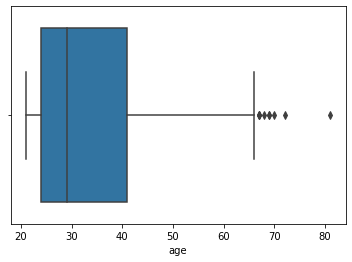

In [7]:
sns.boxplot(diabetes['age'])
plt.show()

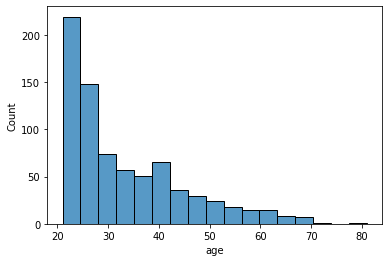

In [8]:
sns.histplot(diabetes['age'])
plt.show()

## 3. Age and BMI vs Class 

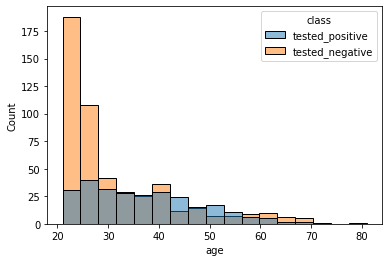

In [9]:
sns.histplot(x = diabetes['age'], hue = diabetes['class'])
plt.show()

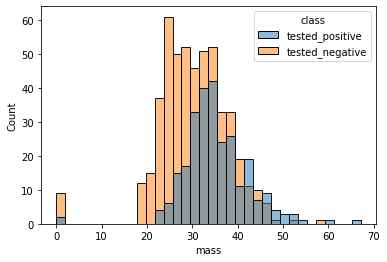

In [10]:
sns.histplot(x = diabetes['mass'], hue = diabetes['class'])
plt.show()

## 4. Dataset Balance

In [11]:
diabetes['class'].value_counts()

tested_negative    500
tested_positive    268
Name: class, dtype: int64

Dataset is not balanced as around 2/3rd of the subjects are negative for diabetes

## 5. Logistic Regression 

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [13]:
diabetes['class'] = diabetes['class'].replace(['tested_positive', 'tested_negative'], [1, 0])

In [14]:
diabetes.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
X = diabetes.copy()
y = X.pop('class')

In [16]:
X.head()

,preg,plas,pres,skin,insu,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [17]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: class, dtype: int64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)

In [19]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [20]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

## 6. Confusion Matrix

In [21]:
from sklearn.metrics import confusion_matrix
c_mat = confusion_matrix(y_test, y_pred)
c_mat

array([[121,  30],
       [ 30,  50]], dtype=int64)

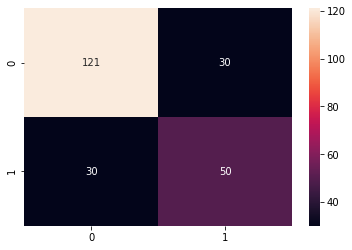

In [22]:
sns.heatmap(c_mat, annot = True, fmt = 'g')
plt.show()

## 7. Accuracy Measuring 

In [23]:
accuracy = (c_mat[0,0] + c_mat[1,1]) / c_mat.sum()
accuracy

0.7402597402597403

In [24]:
tpr = c_mat[1,1] / c_mat[1, :].sum()
tpr

0.625

In [25]:
tnr = c_mat[0,0] / c_mat[0, :].sum()
tnr

0.8013245033112583

The model has an average of 74% accuracy which is a good measure.

The True Positive Rate is lower than the true negative rate by about 18%. This is expected given the balance of the dateset being more towards the negative patients (more date points)

## 8. ROC Curve

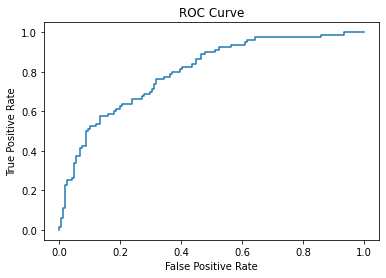

In [26]:
from sklearn import metrics
y_pred_proba = model.predict_proba(X_test)[::, 1]
fpr, tpr , _ = metrics.roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [27]:
auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

0.8002483443708608

If we move the threshold of classification a lot then it reaches a point where the true positive rate is almost stable but false poitives increase

But a point around a 0.2 to 0.4 false poitive rate yields a good classifier as the true poisitve rate is 0.6 to 0.8